In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader

from data_utils import GraspDataset, create_transform_rgb, create_transform_depth

In [3]:
data_dir = "/home/parth/snaak/snaak_data/data_parth"
dataset = GraspDataset(create_transform_rgb(), create_transform_depth(), data_dir)

data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

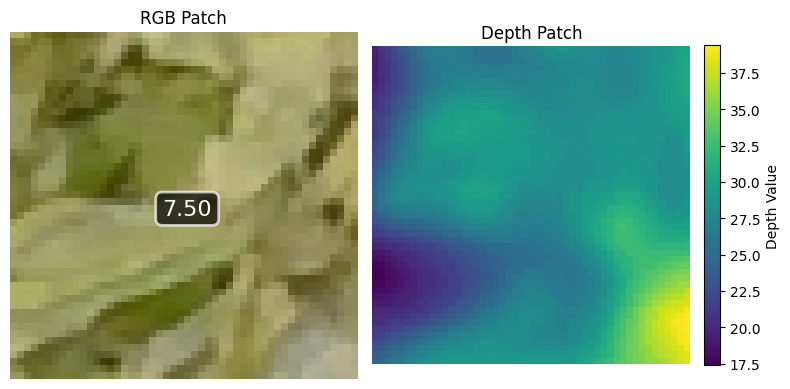

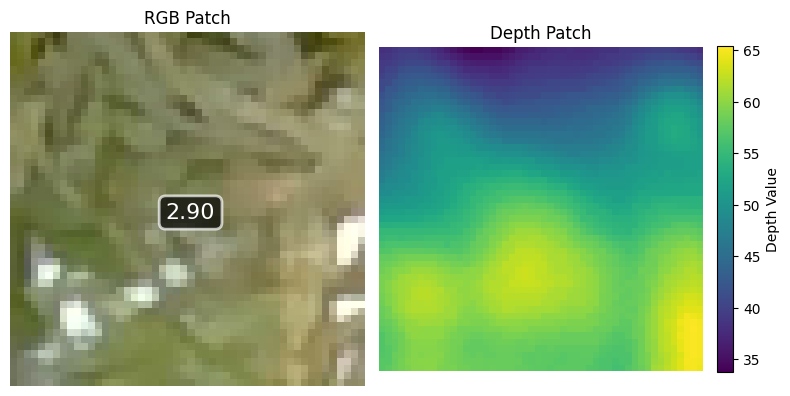

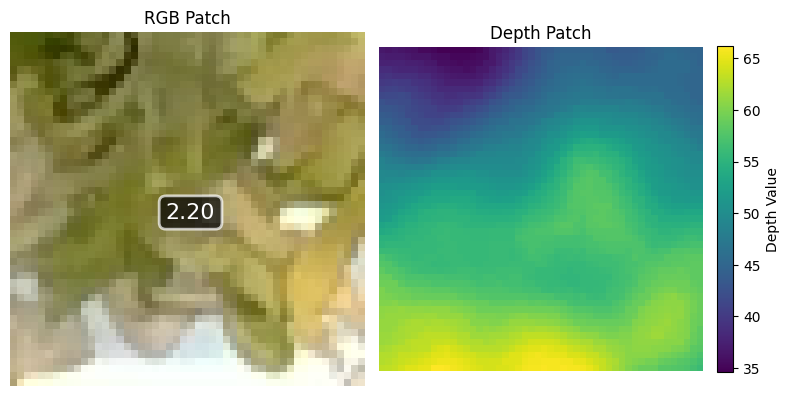

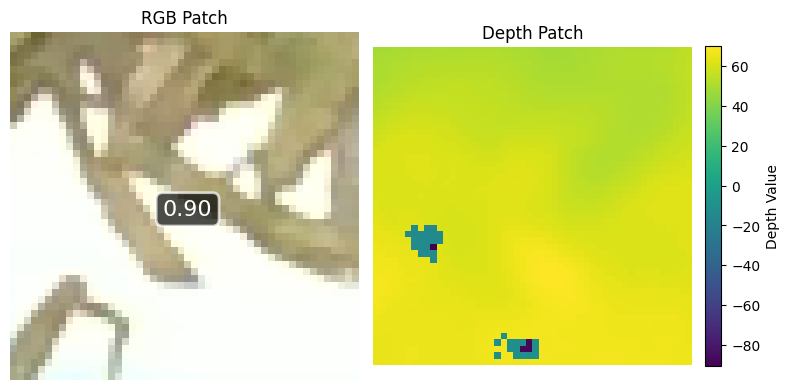

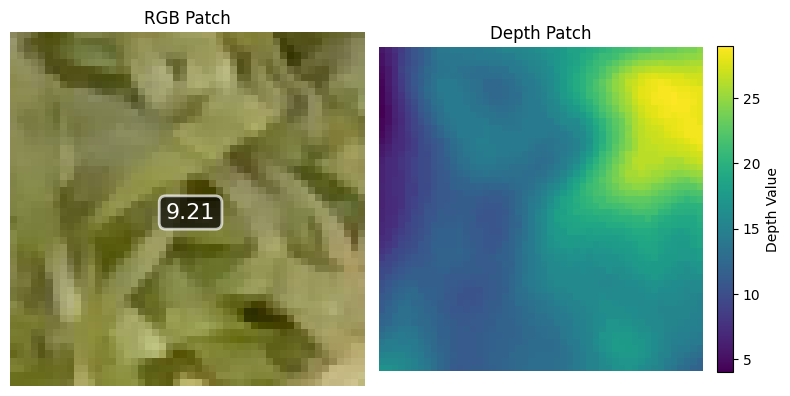

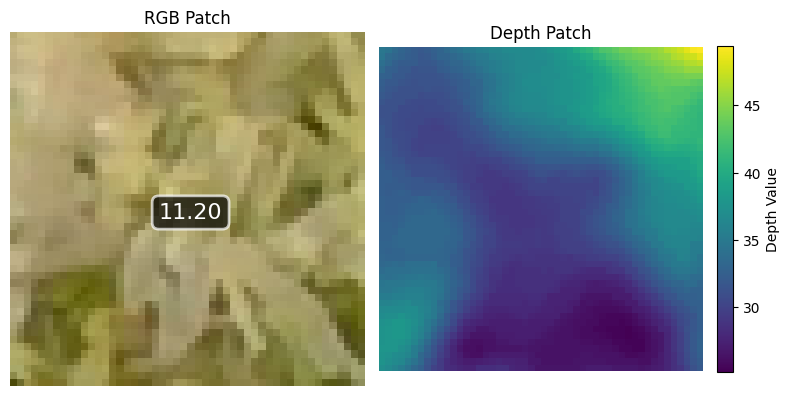

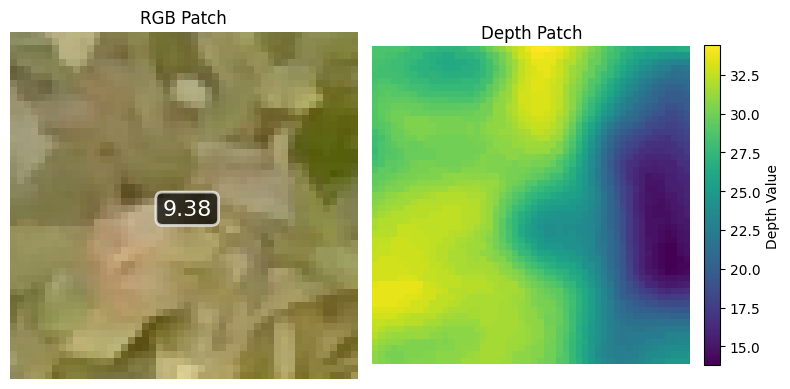

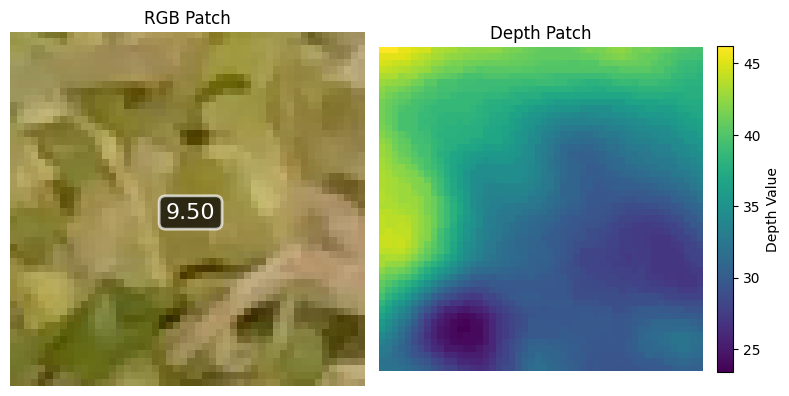

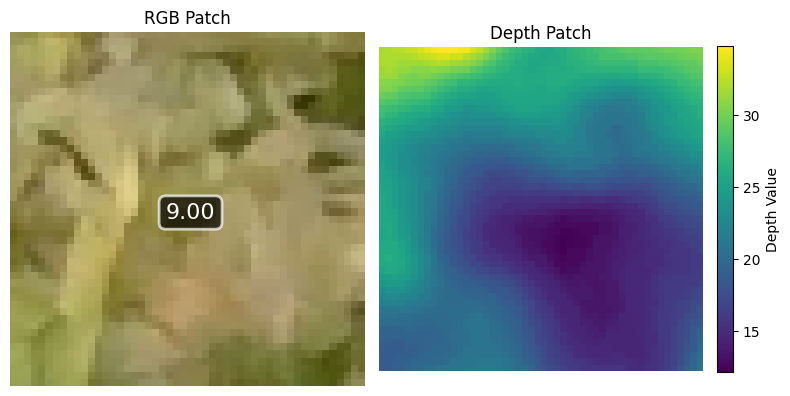

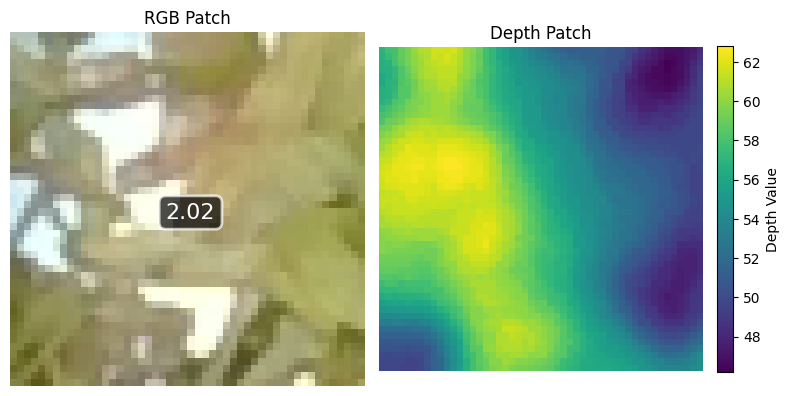

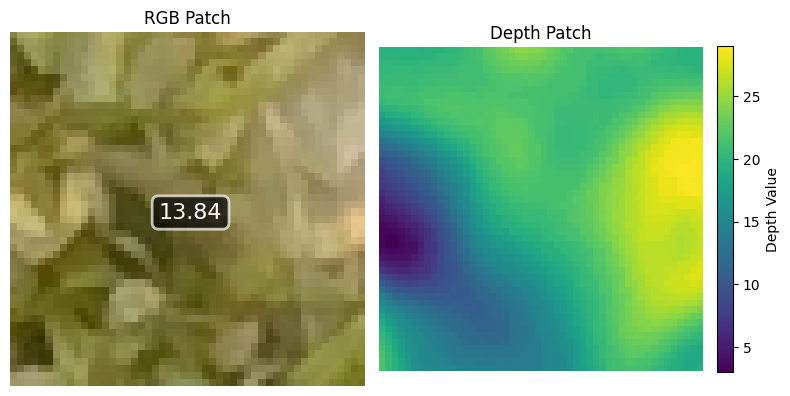

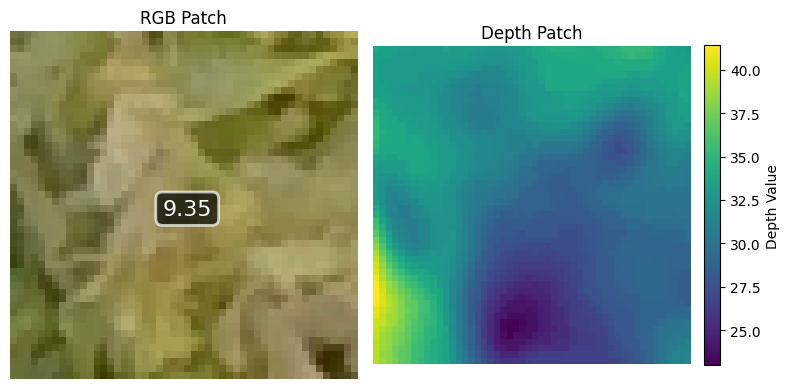

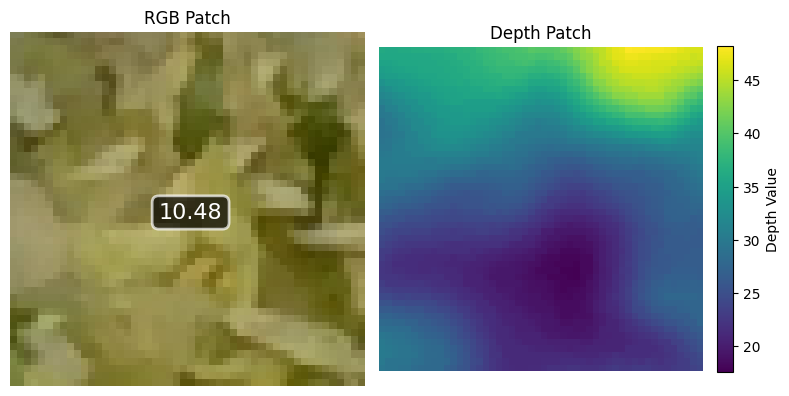

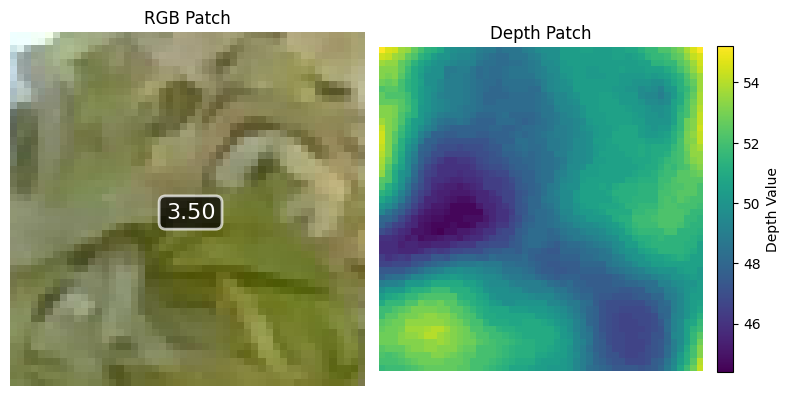

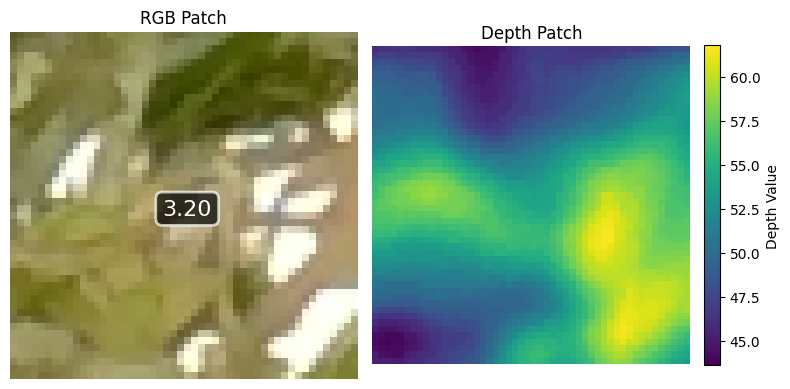

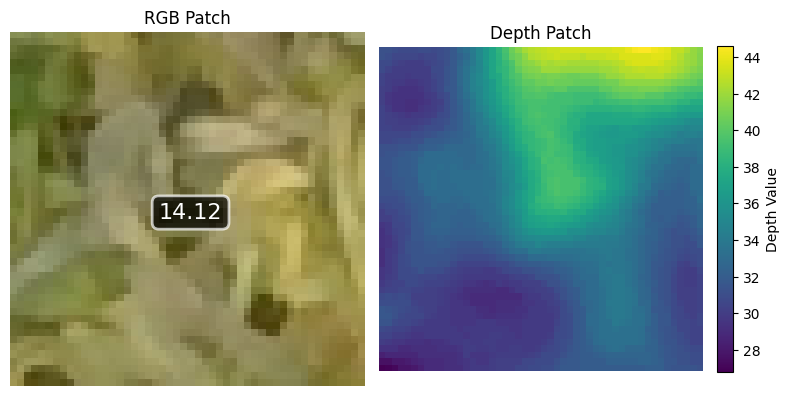

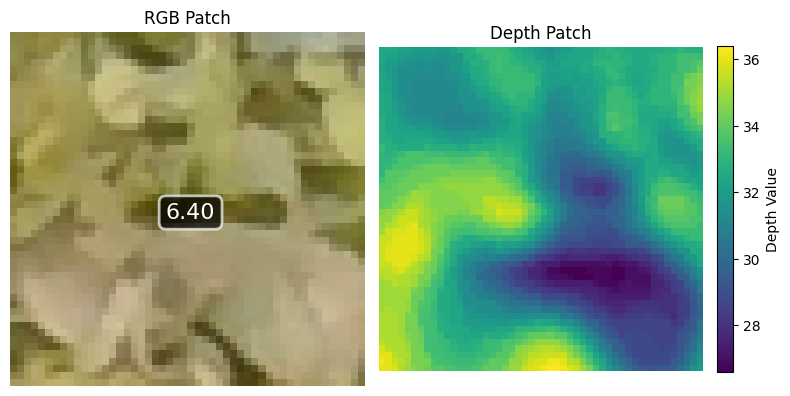

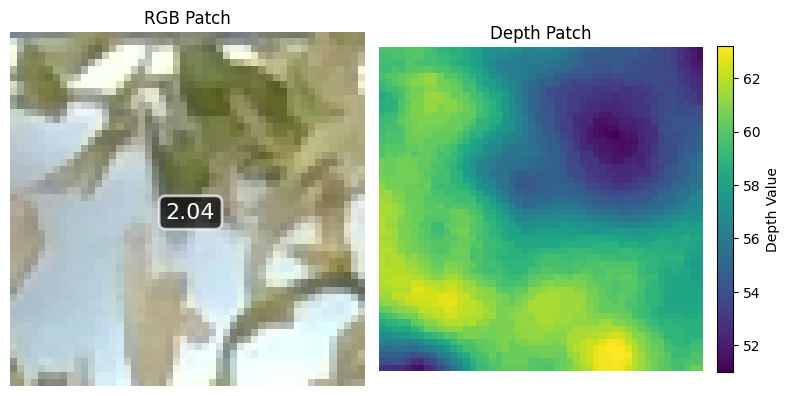

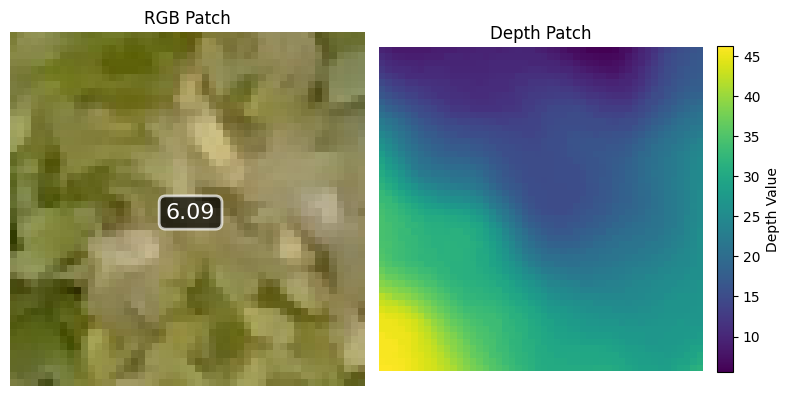

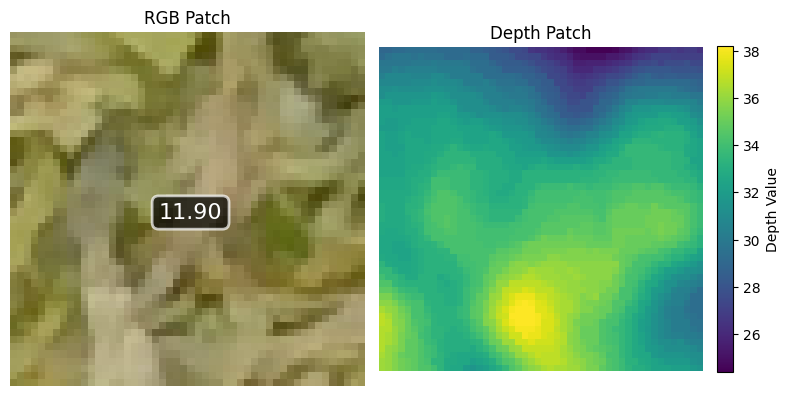

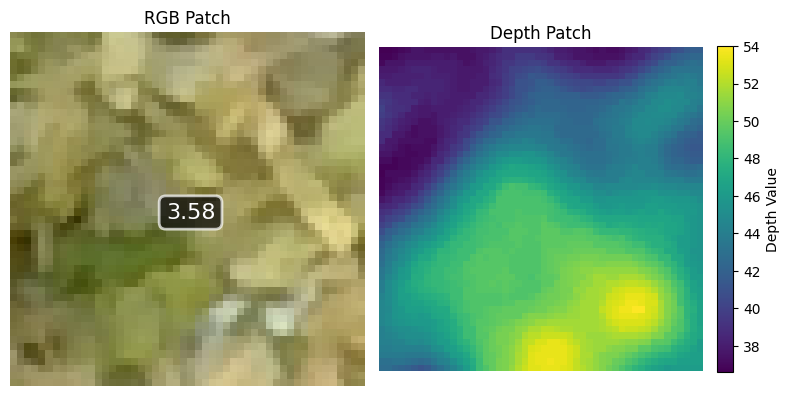

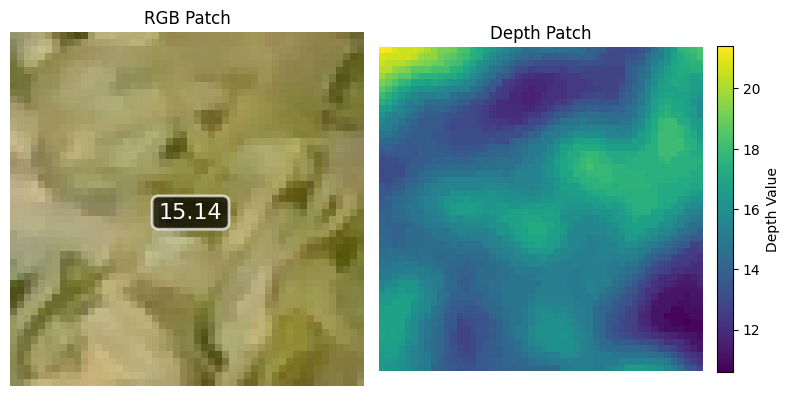

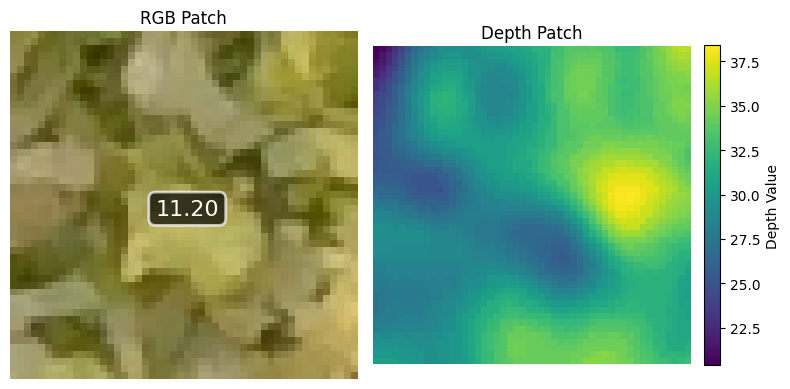

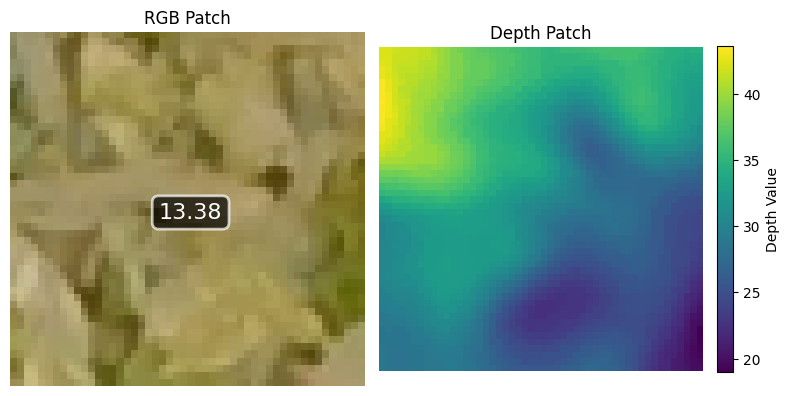

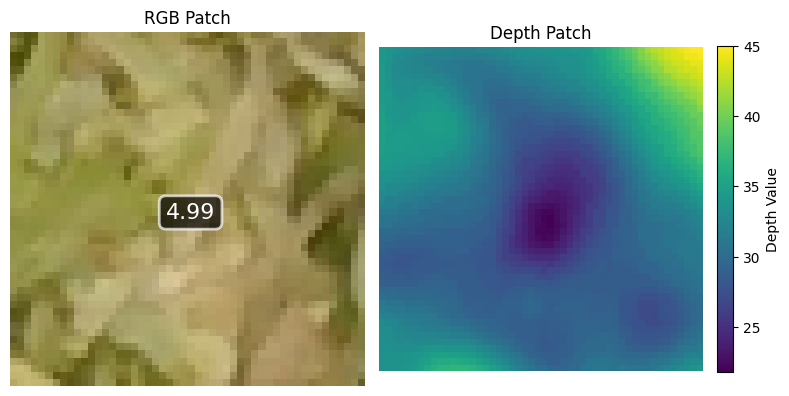

In [4]:
for i, ((rgb_patch, depth_patch), weight_label) in enumerate(data_loader):
    # rgb_patch: (B, 3, H, W), depth_patch: (B, 1, H, W), weight_label: (B,)
    # Remove batch dimension
    rgb_np = rgb_patch[0].permute(1, 2, 0).numpy()  # (H, W, 3)
    depth_np = depth_patch[0, 0].numpy()  # (H, W)
    label = weight_label[0].item()
    H, W, _ = rgb_np.shape

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    # RGB image
    ax1.imshow(rgb_np)
    ax1.set_title("RGB Patch")
    ax1.axis("off")
    # Write the weight label in the center
    ax1.text(
        W // 2,
        H // 2,
        f"{label:.2f}",
        color="white",
        ha="center",
        va="center",
        fontsize=16,
        bbox=dict(boxstyle="round,pad=0.3", fc="black", ec="white", lw=2, alpha=0.7),
    )
    # Depth image
    im_depth = ax2.imshow(depth_np, cmap="viridis")
    ax2.set_title("Depth Patch")
    ax2.axis("off")
    plt.colorbar(im_depth, ax=ax2, fraction=0.046, pad=0.04, label="Depth Value")
    plt.tight_layout()
    plt.show()
